# Clase 3: Ejercicio 3.1

In [ ]:
# Importamos las librerias necesarias

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import sklearn as sklearn
from sklearn.metrics import classification_report

In [ ]:
# Se elaboran los dos datasets distintos
# media (origen) y desvio estandar (dispersion) distintos para ambos datasets

data1 = {'x': np.random.normal(0,2,100),'y': np.random.normal(0,2,100), 'target': np.zeros(100)}
df1 = pd.DataFrame(data1)
  
data2 = {'x': np.random.normal(6,4,100),'y': np.random.normal(6,4,100), 'target': np.ones(100)}
df2 = pd.DataFrame(data2)

df = pd.concat([df1,df2])

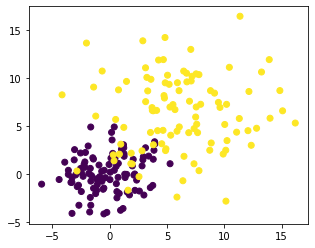

In [ ]:
# Visualización de los datos y su target.

plt.figure(figsize=(5, 4))
plt.scatter(df['x'],df['y'], c=df['target'])

In [ ]:
# elección de la cantidad de vecinos
k = 10

# separacion de datos de training y testeo (X son los valores XeY y Y es el target)
X_train, X_test, y_train, y_test = train_test_split(df[['x','y']], df['target'], test_size=0.2, random_state=20)

# llamada al modelo de entrenamiento
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

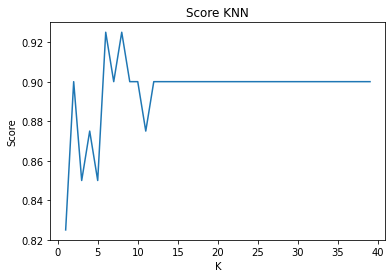

In [ ]:
# Medidas de validez

# Prueba para varios k

vecinos = np.arange(1, 40)
score = np.empty(len(vecinos))
 
for i, k in enumerate(vecinos):
    # se entrena en cada iteracion 
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # y se evalua el score sobre el conjunto de testeo
    score[i] = knn.score(X_test, y_test)

plt.title('Score KNN')
plt.plot(vecinos,score)
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

Se observa que, mientras mas solapados estén los datasets, más vecinos se necesitan para llegar buenos valores de exactitud. Por otro lado, mientras mas separados y demarcados estén los conjuntos, menos vecinos son necesarios (comportamiento esperable, ya que es mas sencillo clasificar si se tienen separaciones claras entre los datasets).

In [ ]:
# Testeo para una prueba o conjunto

target_exp = y_test
target_pred= knn.predict(X_test)

# Reporte de métricas automatico que incluye: RECALL, F1-SCORE, SCORE, etc.

print(classification_report(target_exp, target_pred))

              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88        14
         1.0       1.00      0.85      0.92        26

    accuracy                           0.90        40
   macro avg       0.89      0.92      0.90        40
weighted avg       0.92      0.90      0.90        40

